# Ensemble Techniques Project - Parkinson’s Disease 

**Attribute Information:**
* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency
* variation 9. car name: string (unique for each instance)

## Importing the neccassary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Loading and Observing the data

Approach :

Data skimmed through to see what are the variables present, data type, shape, column names, mixed data types, missing values etc

In [2]:
dataset = pd.read_csv('Data - Parkinsons.csv')
dataset.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
dataset.isna().values.any()

False

In [5]:
dataset.isnull().values.any()

False

In [6]:
dataset.shape

(195, 24)

In [7]:
dataset.status.value_counts()
## Sample bias observed

1    147
0     48
Name: status, dtype: int64

In [8]:
dataset["status"] = pd.Categorical(dataset["status"])

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              195 non-null    object  
 1   MDVP:Fo(Hz)       195 non-null    float64 
 2   MDVP:Fhi(Hz)      195 non-null    float64 
 3   MDVP:Flo(Hz)      195 non-null    float64 
 4   MDVP:Jitter(%)    195 non-null    float64 
 5   MDVP:Jitter(Abs)  195 non-null    float64 
 6   MDVP:RAP          195 non-null    float64 
 7   MDVP:PPQ          195 non-null    float64 
 8   Jitter:DDP        195 non-null    float64 
 9   MDVP:Shimmer      195 non-null    float64 
 10  MDVP:Shimmer(dB)  195 non-null    float64 
 11  Shimmer:APQ3      195 non-null    float64 
 12  Shimmer:APQ5      195 non-null    float64 
 13  MDVP:APQ          195 non-null    float64 
 14  Shimmer:DDA       195 non-null    float64 
 15  NHR               195 non-null    float64 
 16  HNR               195 non-

***Observations from first look at the Parkinson's dataset:***

* There are 24 columns in total
* 'status' was initially of int64 datatype, which was changed to categorical
* There are no missing, null values in the dataset
* 'status' is the target/dependent variable
* Since there are many readings for same test like in MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP, all the columns might not be very useful predictors. These can be highly correlated
* The mix of the status is not adequate i.e 147 out of 195 is "1". This means the prediction is highly likely to be 1 due to the sample bias. Hence, accuracy alone will not be a good measure, class level performance will have to be evaluated during model building



## Exploratory Data Analysis

#### Five Point Summary

In [10]:
dataset.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

#### Univariate Analysis

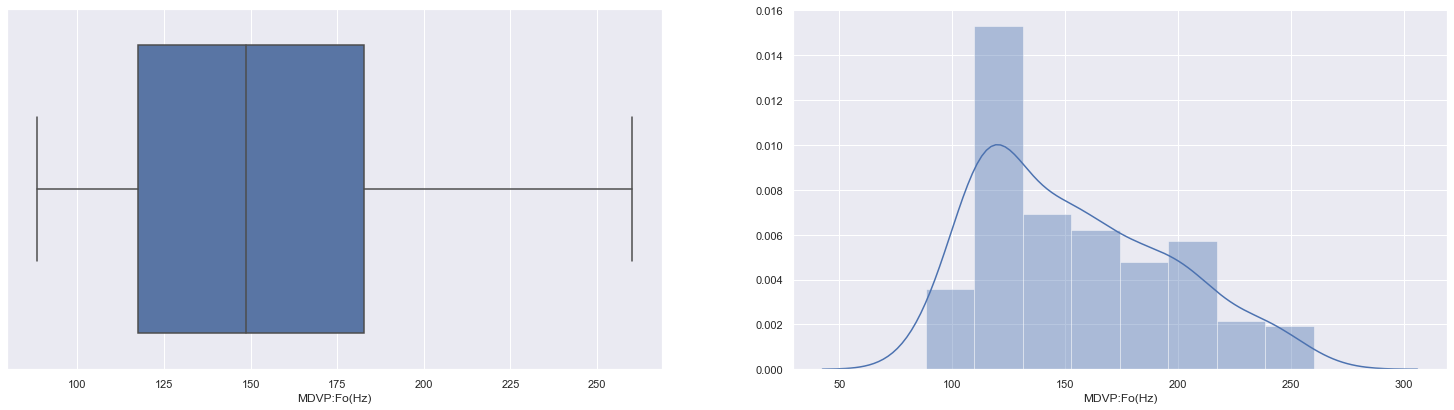

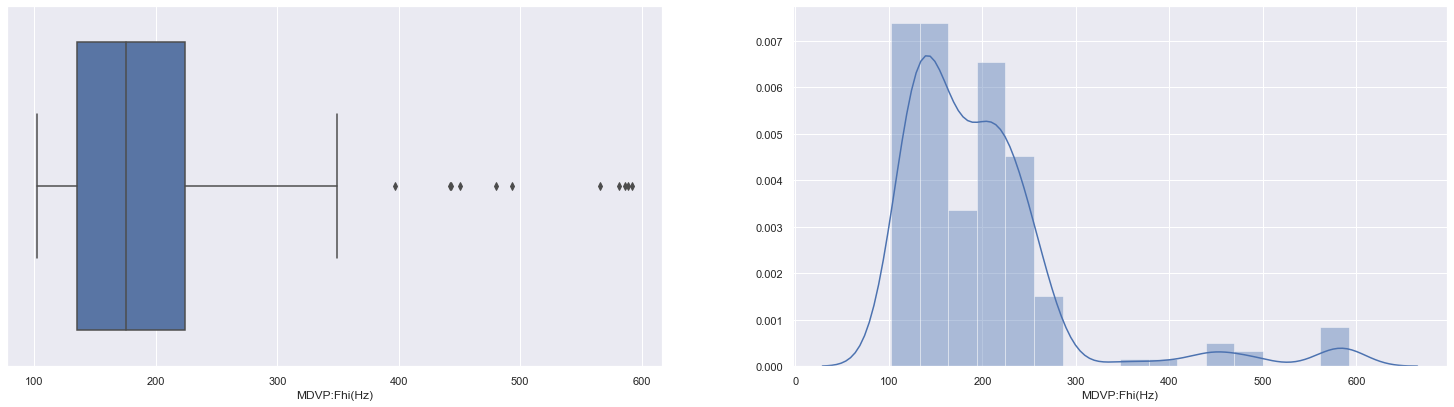

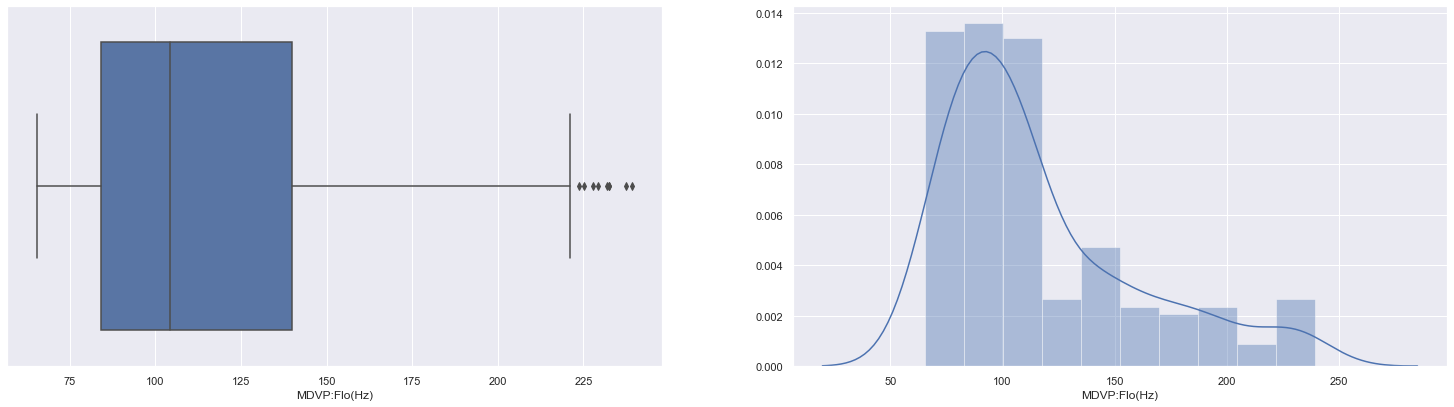

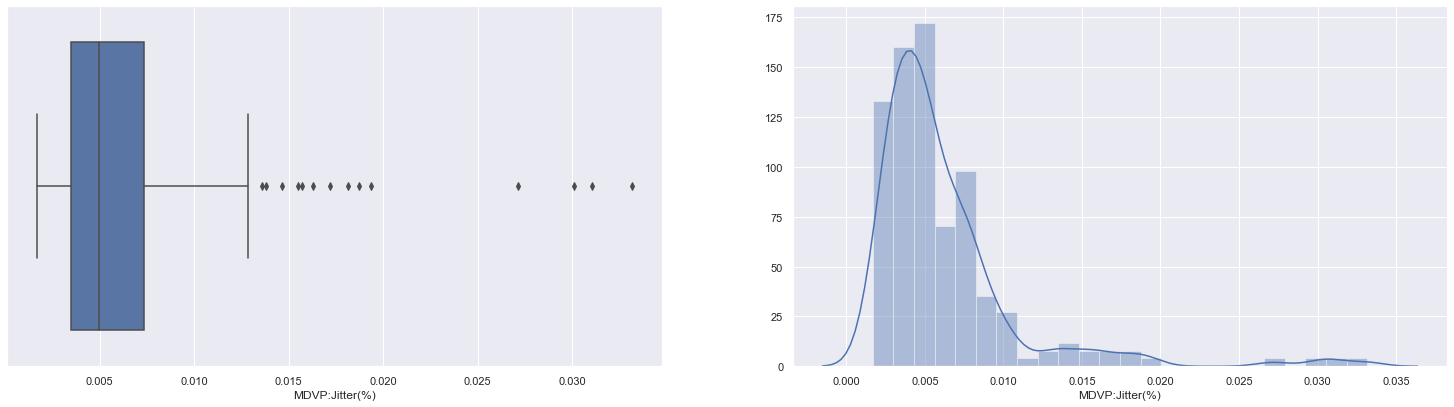

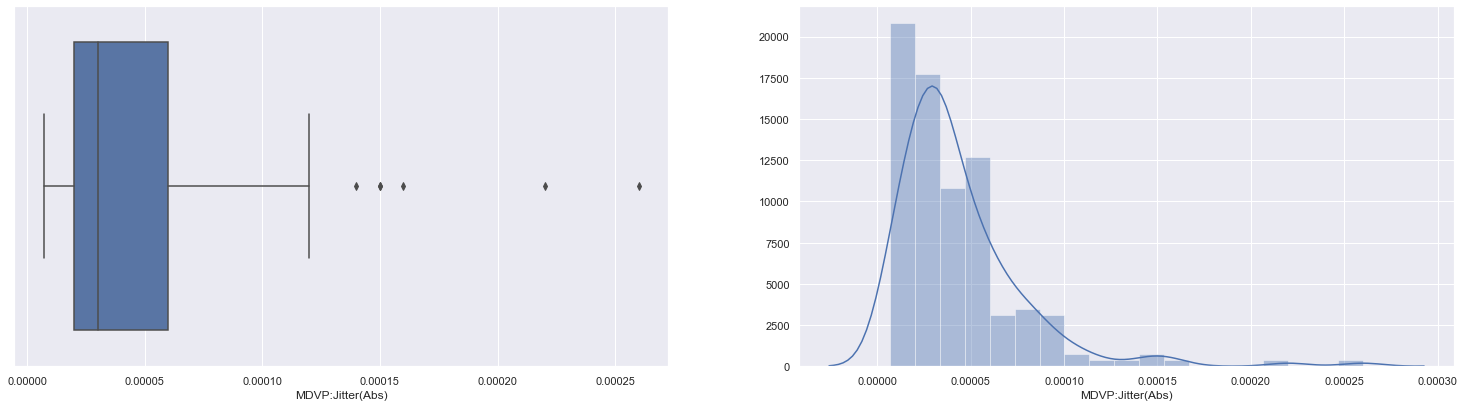

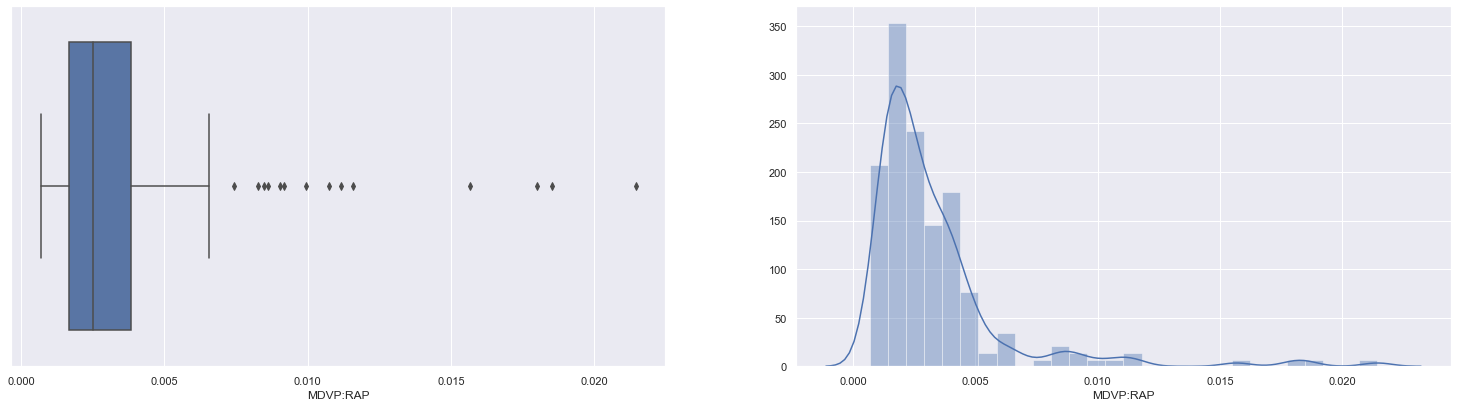

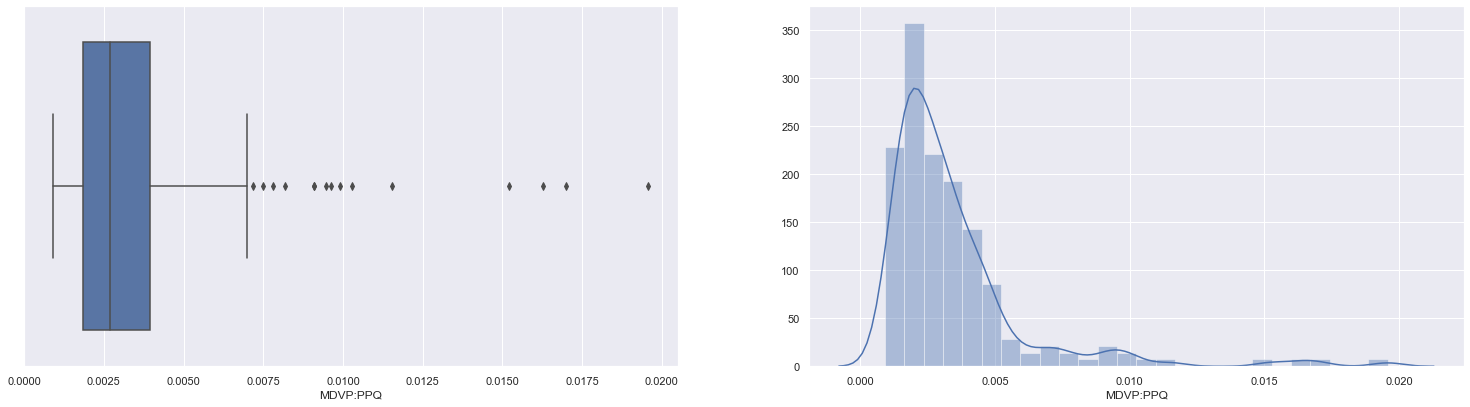

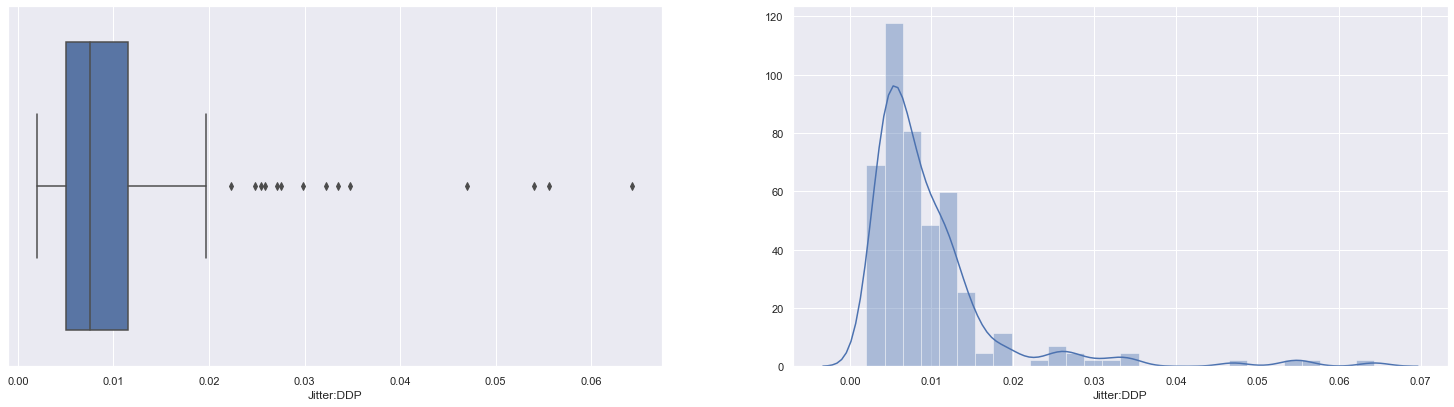

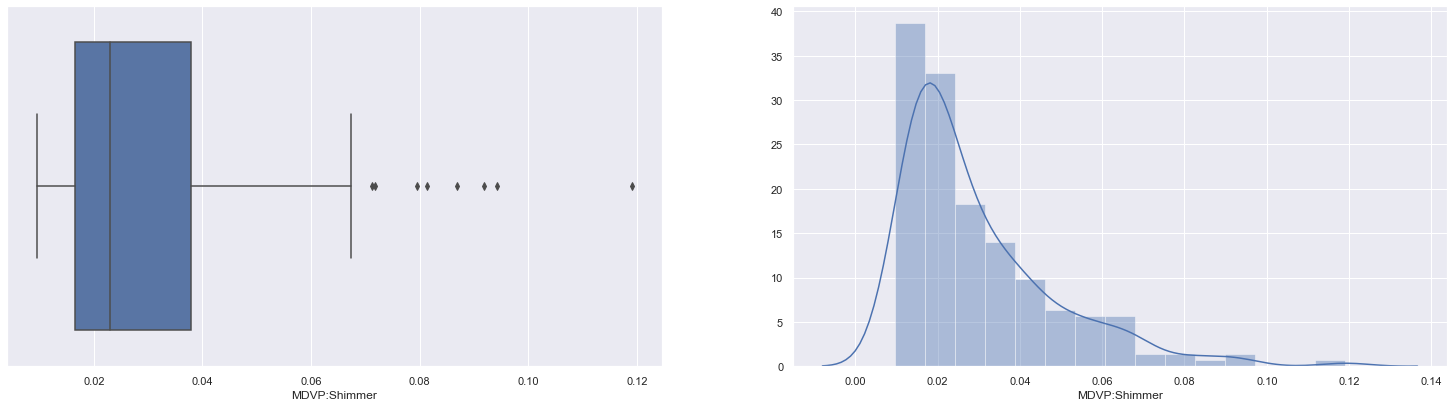

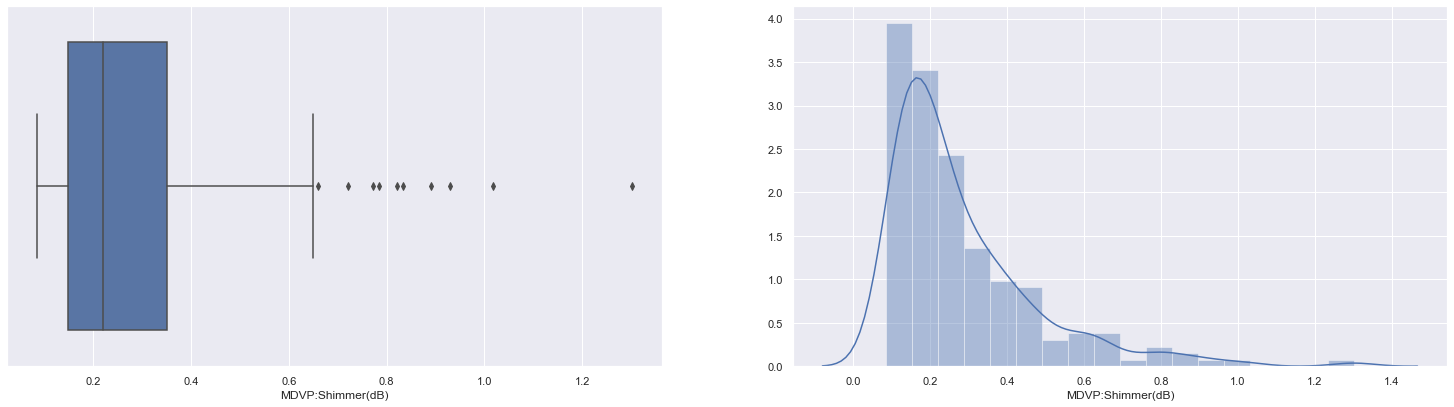

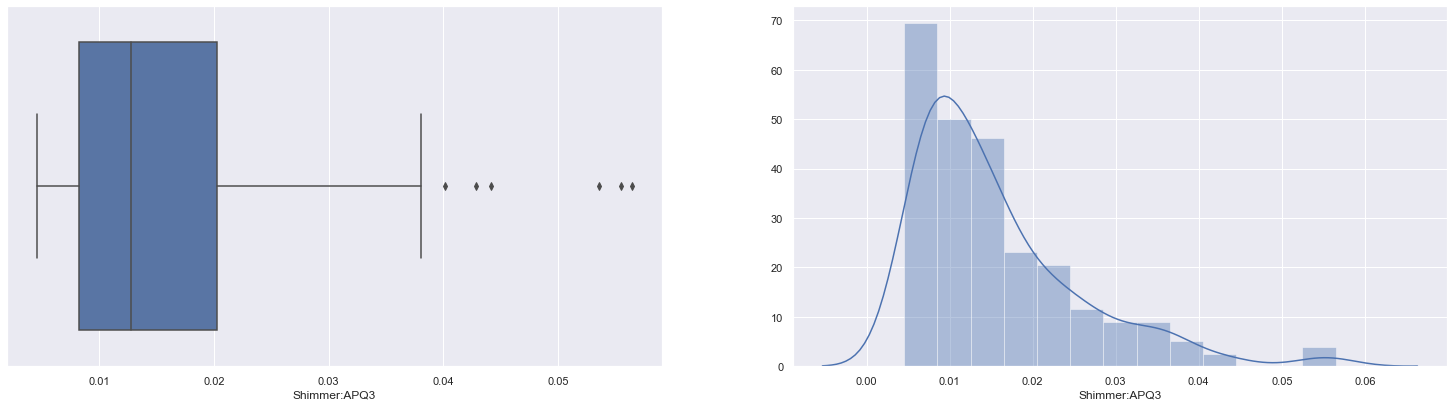

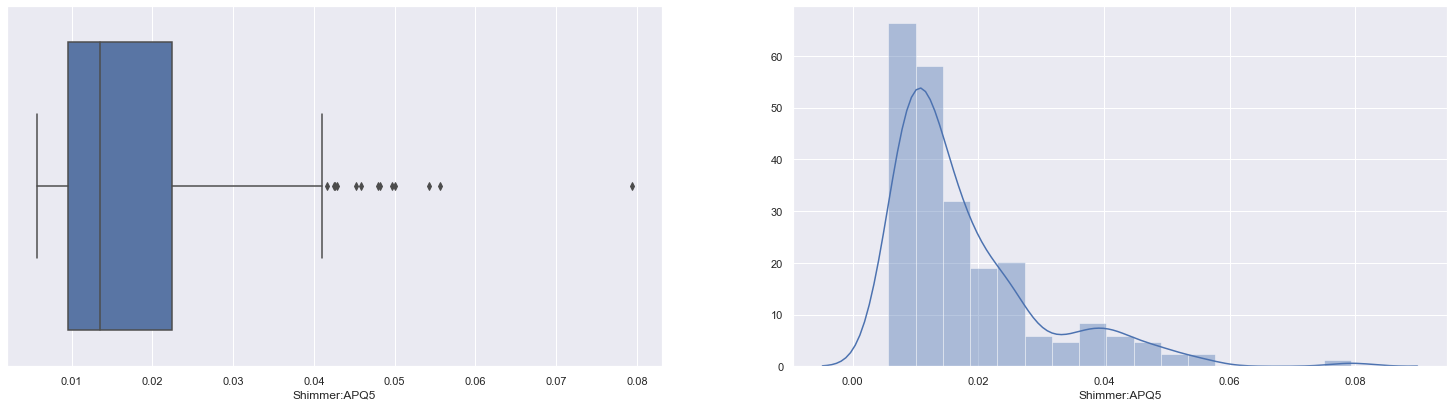

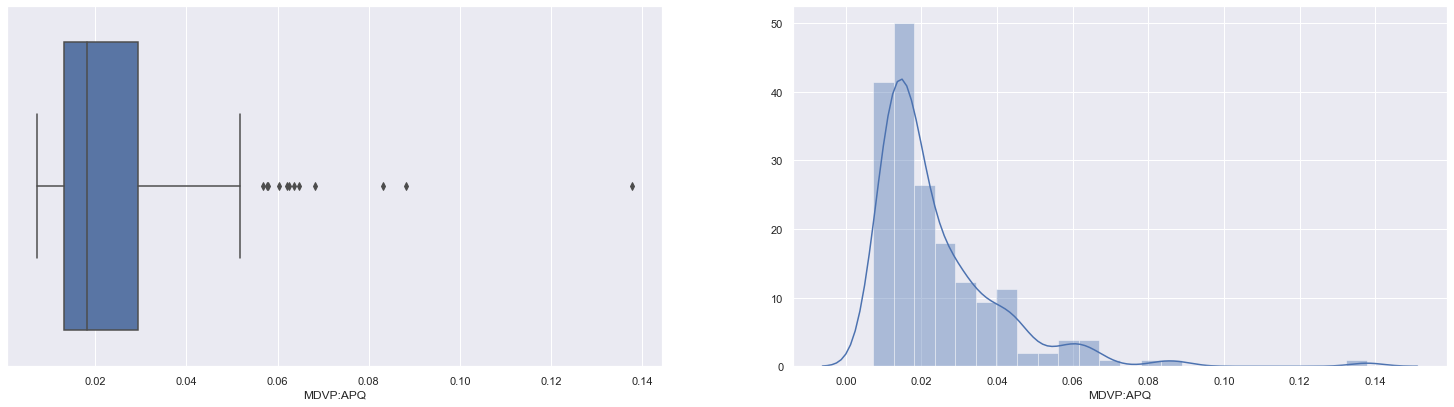

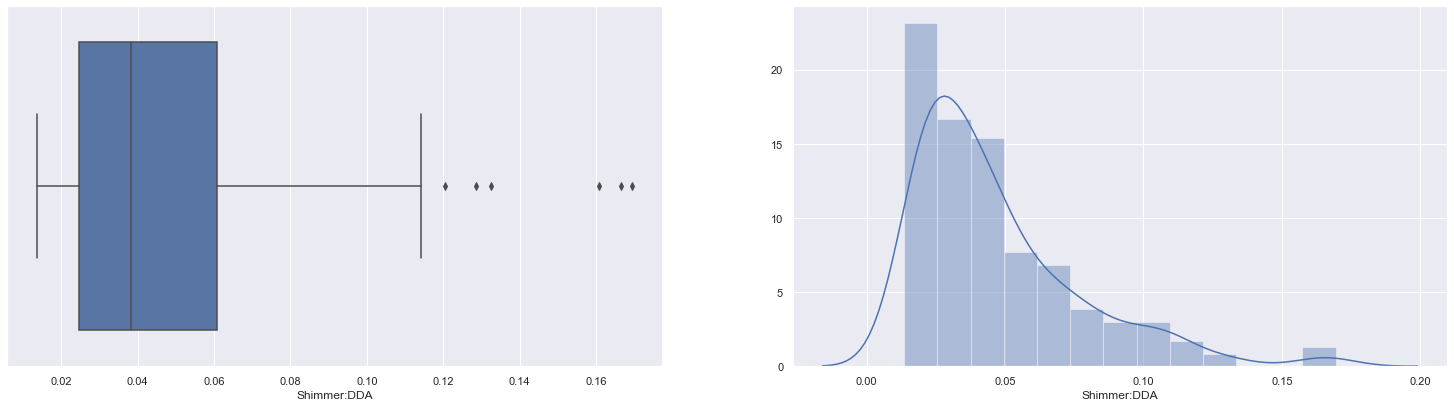

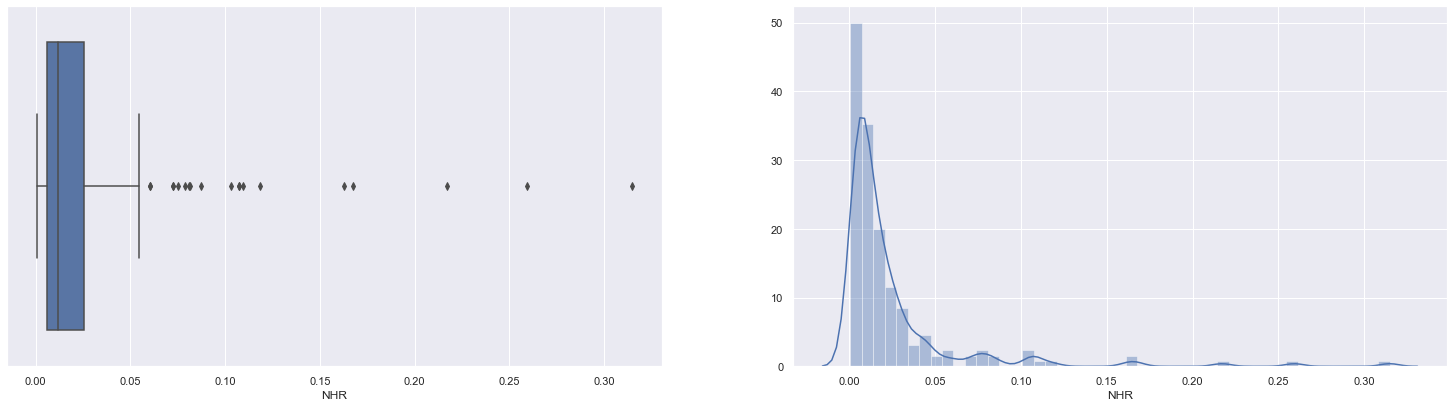

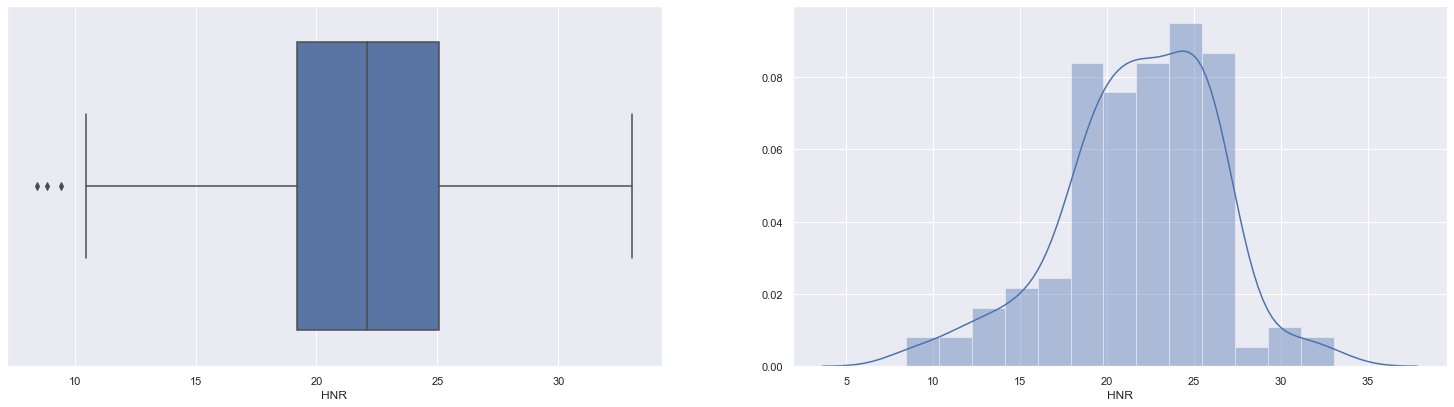

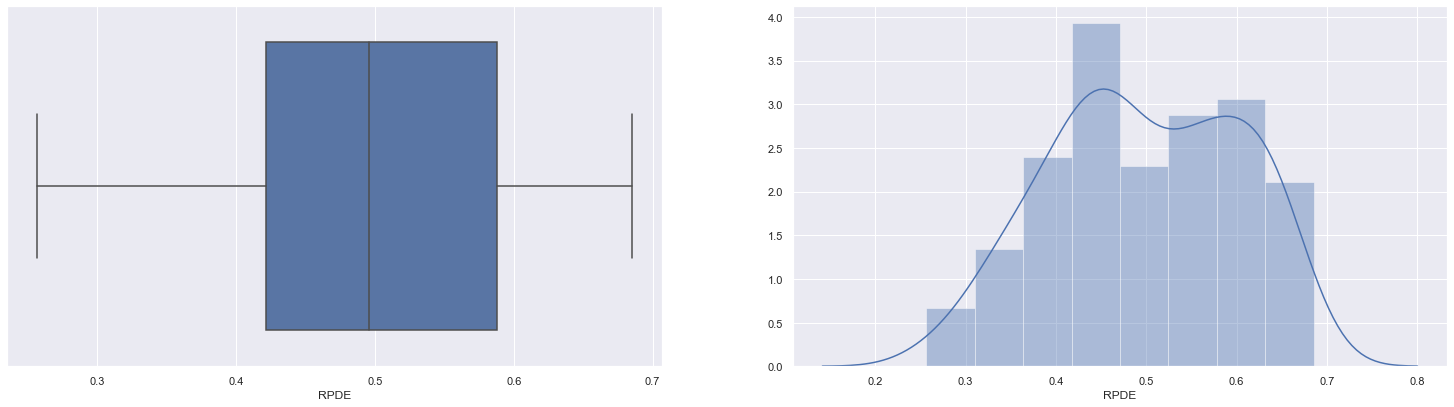

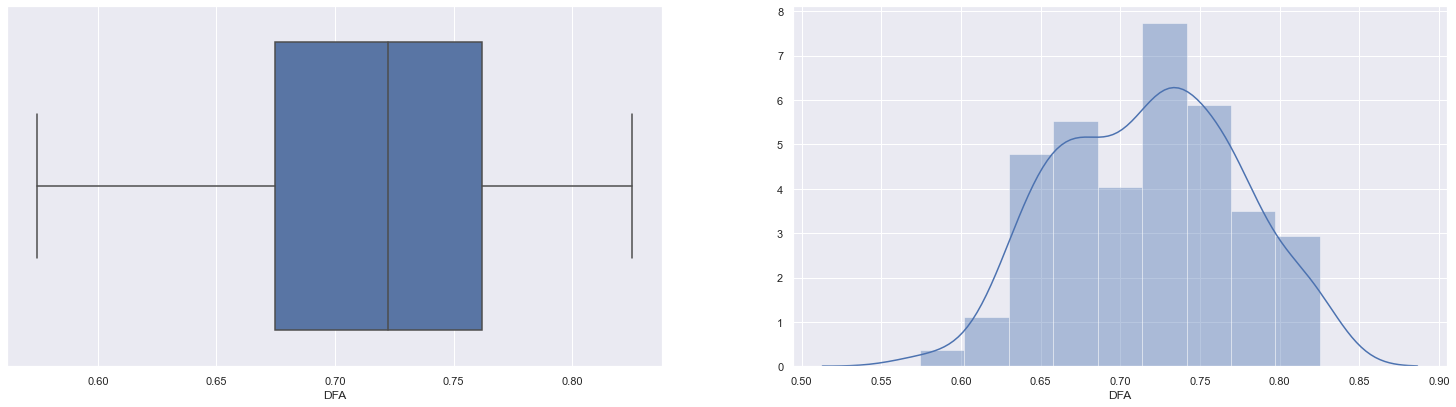

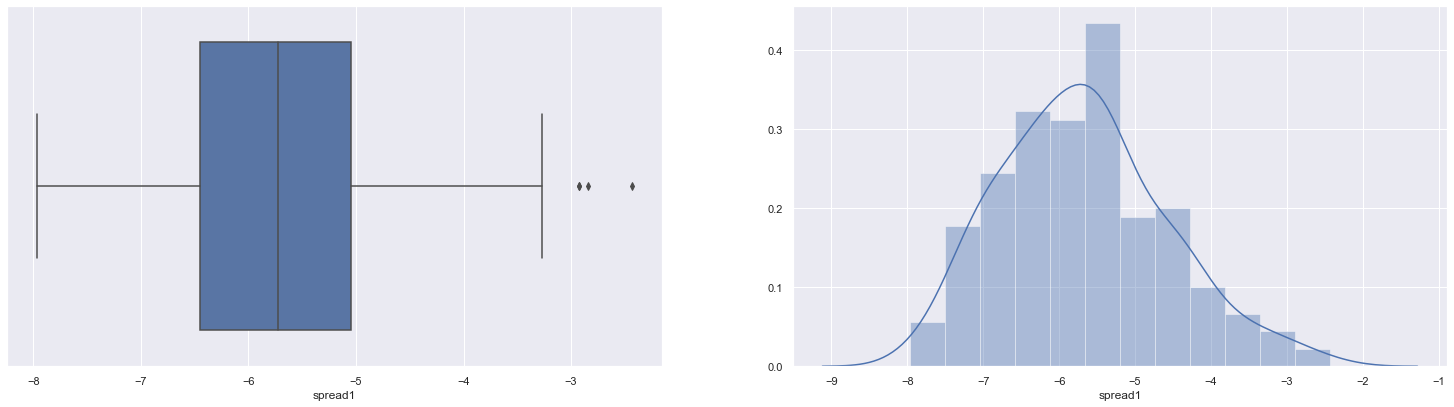

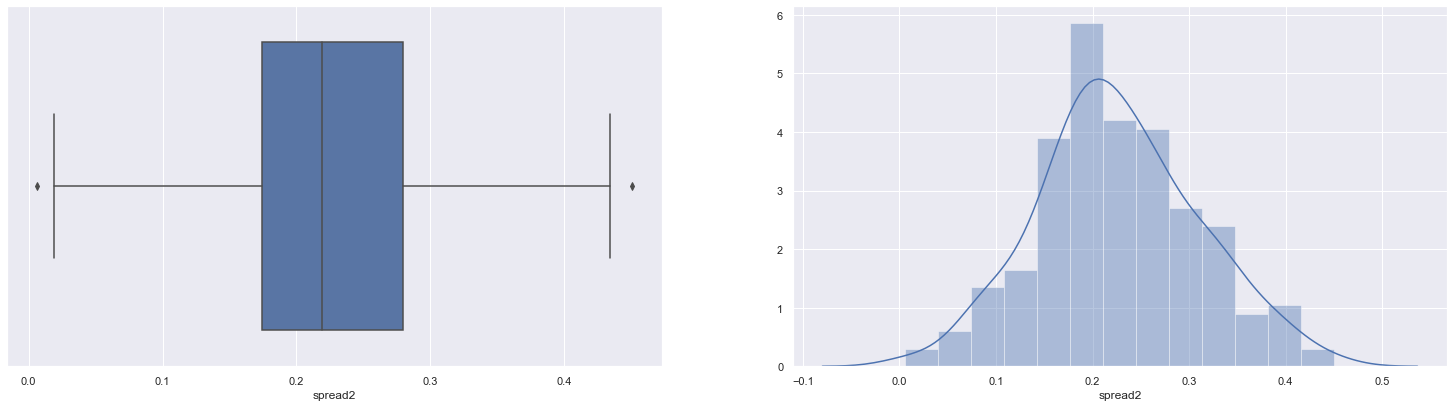

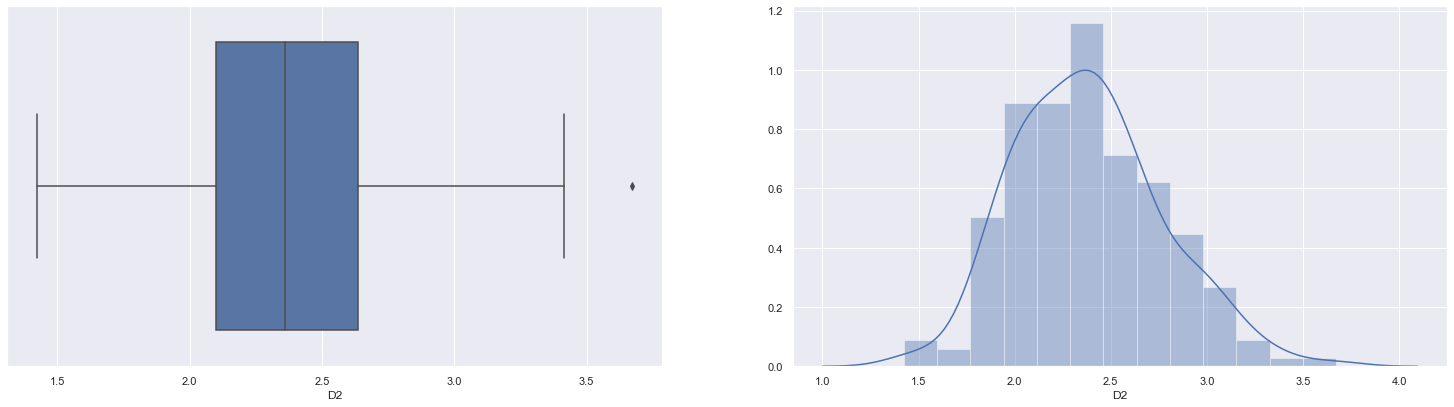

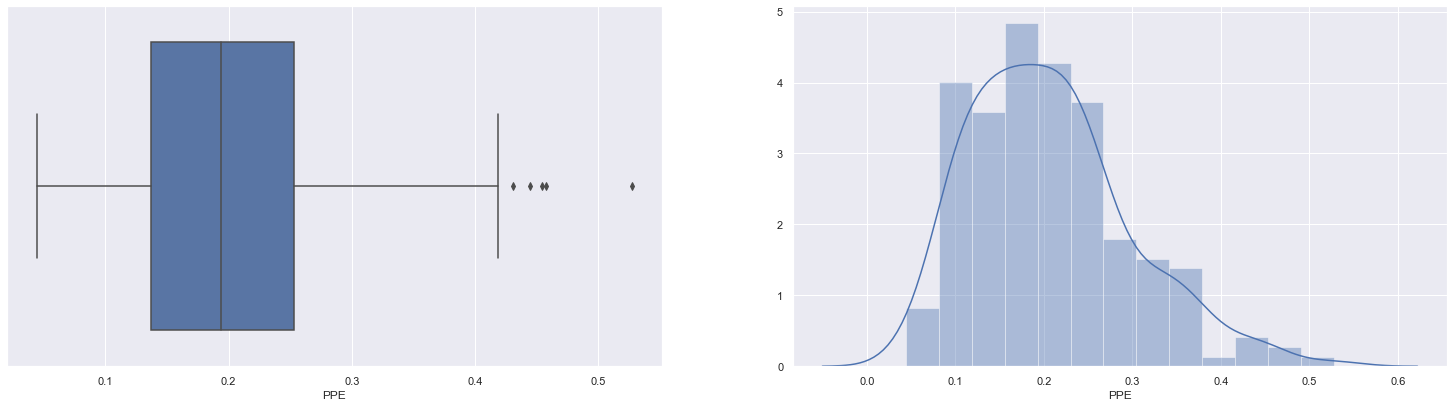

In [11]:
def univariate_plots(Source):
    a = pd.Series(Source.select_dtypes(include=['float64']).columns)
    leng = len(a)
    for j in range(0,len(a)):
        plt.Text('Figure for float64')
        f, axes = plt.subplots(1, 2, figsize=(10, 10))
        sns.boxplot(Source[a[j]], ax = axes[0])
        sns.distplot(Source[a[j]], ax = axes[1])
        plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

univariate_plots(dataset)

***Observations:***

1. **MDVP:Fo(Hz):** 
    * Slight Right Skeweness
    * No outliers as suggested by the boxplot
2. **MDVP:Fhi(Hz):**
    * High positive skewness
    * Outliers present
    * Distplot shows there is a slight bi-modal distribution indicating a possible gaussian mixture.
3. **MDVP:Flo(Hz):**
    * High positive skewness
    * Outliers present
4. **MDVP:Jitter(%):**
    * Outliers are quite a number for this variable and is evident in box plot
    * High positive skewness
5. **MDVP:Jitter(Abs):**
    * Outliers are quite a number for this variable and is evident in box plot
    * High positive skewness
6. **MDVP:RAP:**
    * Positive skewness
    * Many outliers
7. **MDVP:PPQ:**
    * High positive skewness
    * Outliers are quite a number for this variable and is evident in box plot
8. **Jitter:DDP:**
    * High positive skewness
    * Outliers are quite a number for this variable and is evident in box plot
9. **MDVP:Shimmer:**
    * Slight positive skewness
    * Outliers are quite a number for this variable and is evident in box plot
10. **MDVP:Shimmer(dB):**
    * Slight positive skewness
    * Outliers are a lot for this variable and is evident in box plot
11. **Shimmer:APQ3:**
    * Slight positive skewness
    * Outliers are few for this variable and is evident in box plot
12. **Shimmer:APQ5:**
    * Slight positive skewness
    * Outliers are few for this variable and is evident in box plot
13. **MDVP:APQ:**
    * Hight positive skewness
    * Outliers are few for this variable and is evident in box plot
14. **Shimmer:DDA:**
    * Slight positive skewness
    * Outliers are few for this variable and is evident in box plot
15. **NHR:**
    * Extremely high positive skewness
    * Outliers are many for this variable and is evident in box plot
16. **HNR:**
    * Slight negative skewness
    * Outliers are few for this variable and is evident in box plot
17. **RPDE:**
    * Slight negative skewness
    * No outliers as shown in the boxplot
18. **DFA:**
    * Neglegible negative skewness
    * No outliers as shown in the boxplot
19. **spread1:**
    * Slight positive skewness
    * Outliers are few for this variable and is evident in box plot
20. **spread2:**
    * Slight positive skewness
    * Two Outliers are present for this variable and is evident in box plot
21. **D2:**
    * High positive skewness
    * One Outlier is present for this variable and is evident in box plot
22. **PPE:**
    * High positive skewness
    * Outliers are few for this variable and is evident in box plot

#### Bivariate Analysis

##### Correlation Plot and pairplot

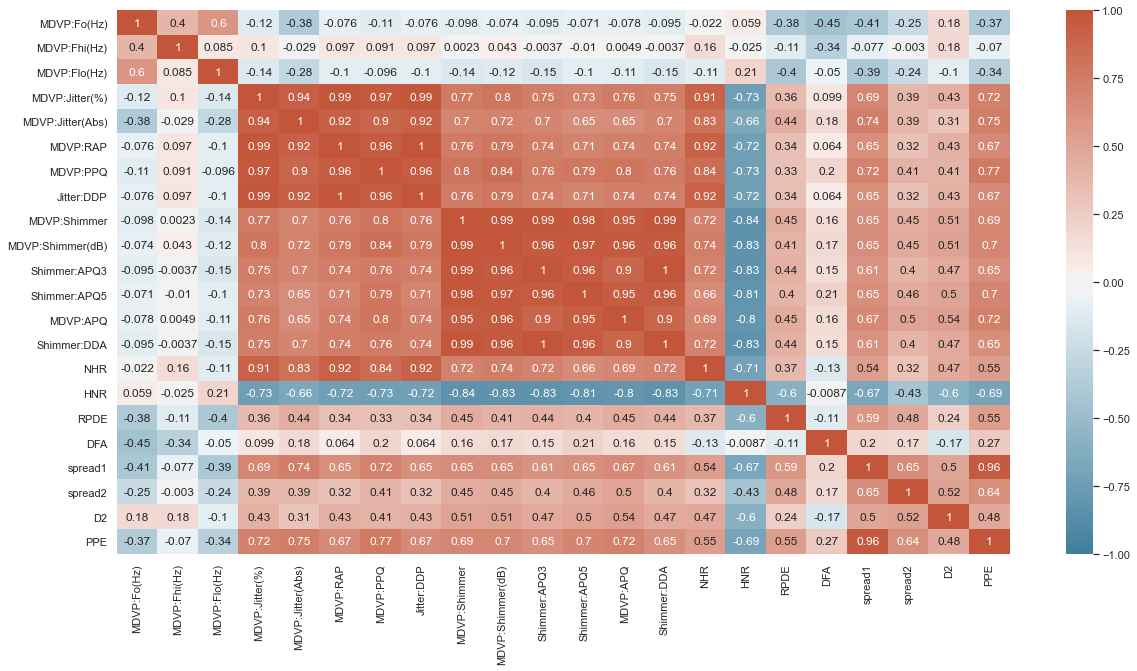

In [12]:
def EDA_Corr(df):
        """This gives output as Covariance matrix and feature wise uniquess i.e how much its statistically
        independent. This is done with default range of corr between +0.5 to -0.6"""
        corr = df.corr()
        index = corr.columns
        Output = []
        for i in range(0,len(index)):
            i = index[i]
            Pos = corr.index[(corr[i] >= 0.5)].tolist()
            No = corr.index[(corr[i] < 0.5) & (corr[i] > -0.6)].tolist()
            Neg = corr.index[(corr[i] <= -0.5)].tolist()
            leng_u = len(No)
            leng_pos = len(Pos)
            leng_neg = len(Neg)
            Out = [i, leng_u, leng_pos, leng_neg, Pos, Neg, No]
            Output.append(Out)
        fig, ax = plt.subplots(figsize=(20,10)) 
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap=cmap, linewidths=0, ax = ax)
EDA_Corr(dataset)

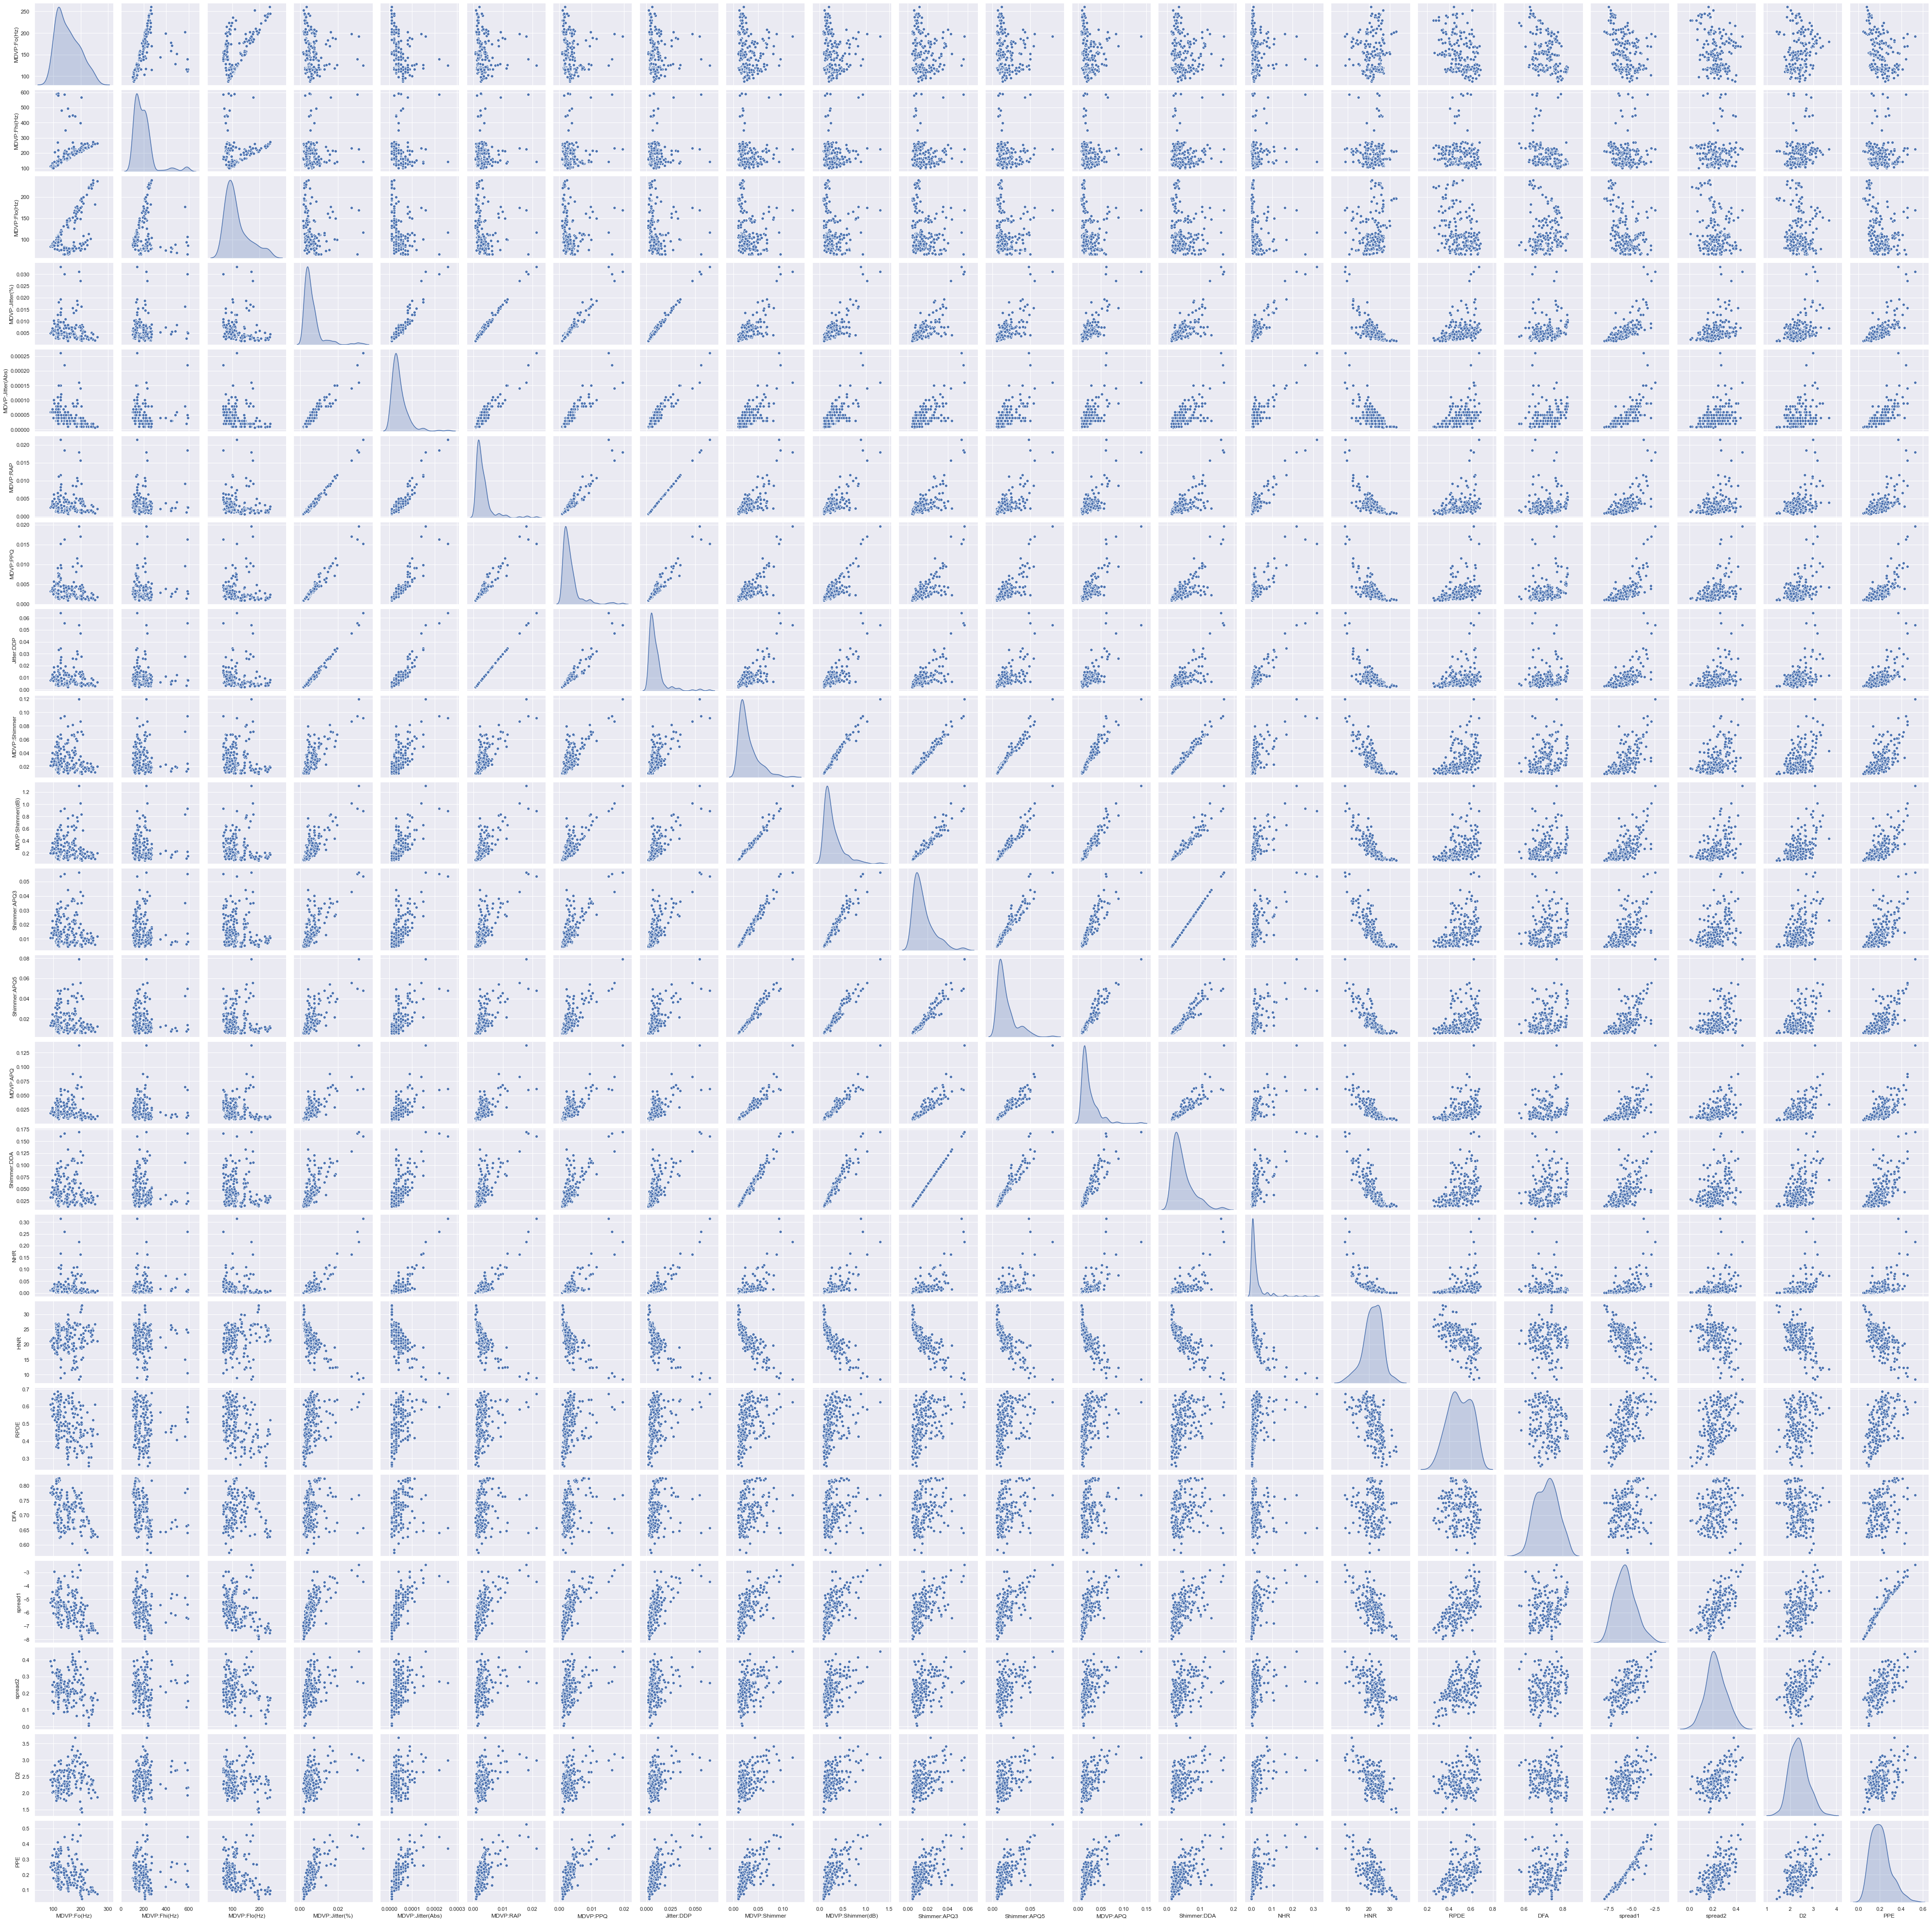

In [15]:
temp_df = dataset.drop(['name','status'], axis='columns')
sns.pairplot(temp_df, diag_kind='kde')

##### Target Column distribution

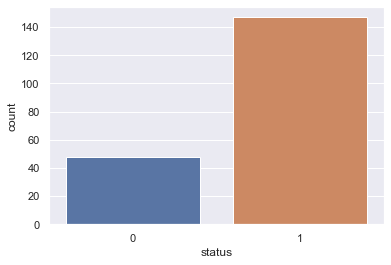

In [13]:
sns.countplot(dataset.status)

***Observations:***

* MDVP:Fhi(Hz), DFA, MDVP:Fo(Hz), MDVP:Flo(Hz) , RPDE, spread2, D2 have less correlationships with other Xs. This means that they can be potentially a good predictor
*  PPE, spread1, MDVP:APQ, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ5, MDVP:PPQ, Jitter:DDP, MDVP:RAP, MDVP:Jitter(Abs), Shimmer:APQ3, MDVP:Jitter(%), Shimmer:DDA, NHR are correlated by other variables & each other positively.
* HNR has negative correlation with most of the variable
* The Target column (status) has heavy sample bias.

## Splitting data into Train and Test

In [14]:
X = dataset.drop(['name','status'], axis='columns')
y = dataset.status
X.head(1)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0    0.0037   0.00554     0.01109       0.04374             0.426  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  

[1 rows x 22 columns]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Feature Engineering

##### Checking missing values

In [67]:
print(dataset.isna().values.any())
print(dataset.isnull().values.any())

False
False


##### Scaling

In [68]:
scale = StandardScaler()

In [69]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Building Models

### Classification Models

##### Logistic Regression

Logistic Regression model score (Training Data): 0.8455882352941176
Logistic Regression model score (Testing Data): 0.8983050847457628
True Possitive    =  43
True Negative     =  10
False Possive     =  2
False Negative    =  4
Logistic Regression - Classification Report
              precision    recall  f1-score   support

           1       0.96      0.91      0.93        47
           0       0.71      0.83      0.77        12

   micro avg       0.90      0.90      0.90        59
   macro avg       0.83      0.87      0.85        59
weighted avg       0.91      0.90      0.90        59

Logistic_Accuracy = 0.8983050847457628
Logistic_Gini = 0.9219858156028367
Logistic_AUC = 0.9609929078014183
Precision for Logistic regression : 0.96
Recall for Logistic regression : 0.91
F1 score for Logistic regression : 0.93


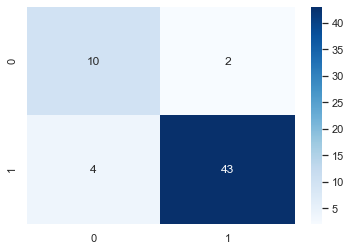

In [70]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_score_train = log_model.score(X_train, y_train)
print('Logistic Regression model score (Training Data):', log_score_train)

log_score = log_model.score(X_test, y_test)
print('Logistic Regression model score (Testing Data):', log_score)

log_pred = log_model.predict(X_test)

log_cm = confusion_matrix(y_test, log_pred)
print('True Possitive    = ',   log_cm[1][1])
print('True Negative     = ',   log_cm[0][0])
print('False Possive     = ',   log_cm[0][1])
print('False Negative    = ',   log_cm[1][0])

print("Logistic Regression - Classification Report")
print(classification_report(y_test, log_pred, labels=[1, 0]))

probs = log_model.predict_proba(X_test)
preds = probs[:,1]
Logistic_Accuracy = accuracy_score(y_test,log_pred)
print('Logistic_Accuracy =', Logistic_Accuracy)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
Logistic_Gini = 2*roc_auc - 1
print('Logistic_Gini =', Logistic_Gini)
Logistic_AUC = roc_auc
print('Logistic_AUC =', Logistic_AUC)

sns.heatmap(confusion_matrix(y_test,log_pred), annot=True, cmap='Blues',fmt='g')

prec_log = (log_cm[1][1])/(log_cm[1][1] + log_cm[0][1])
rec_log = (log_cm[1][1])/(log_cm[1][1] + log_cm[1][0])
F1_log = 2*(prec_log*rec_log)/(prec_log + rec_log)
print('Precision for Logistic regression :', round(prec_log,2))
print('Recall for Logistic regression :', round(rec_log, 2))
print('F1 score for Logistic regression :', round(F1_log, 2))

##### Naive Bayes (Gaussian)

NB model score (Training Data): 0.6985294117647058
NB model score (Testing Data): 0.6949152542372882
True Possitive    =  29
True Negative     =  12
False Possive     =  0
False Negative    =  18
NB - Classification Report
              precision    recall  f1-score   support

           1       1.00      0.62      0.76        47
           0       0.40      1.00      0.57        12

   micro avg       0.69      0.69      0.69        59
   macro avg       0.70      0.81      0.67        59
weighted avg       0.88      0.69      0.72        59

NB_Accuracy = 0.6949152542372882
NB_Gini = 0.8900709219858156
NB_AUC = 0.9450354609929078
Precision for Naive Bayes : 1.0
Recall for Naive Bayes : 0.62
F1 score for Naive Bayes : 0.76


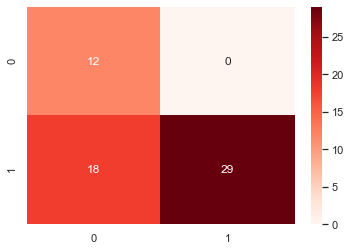

In [71]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_score_train = nb_model.score(X_train, y_train)
print('NB model score (Training Data):', nb_score_train)

nb_score = nb_model.score(X_test, y_test)
print('NB model score (Testing Data):', nb_score)

nb_pred = nb_model.predict(X_test)
nb_cm = confusion_matrix(y_test, nb_pred)
print('True Possitive    = ',   nb_cm[1][1])
print('True Negative     = ',   nb_cm[0][0])
print('False Possive     = ',   nb_cm[0][1])
print('False Negative    = ',   nb_cm[1][0])

print("NB - Classification Report")
print(classification_report(y_test, nb_pred, labels=[1, 0]))

probs = nb_model.predict_proba(X_test)
preds = probs[:,1]
NB_Accuracy = accuracy_score(y_test,nb_pred)
print('NB_Accuracy =', NB_Accuracy)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
NB_Gini = 2*roc_auc - 1
print('NB_Gini =', NB_Gini)
NB_AUC = roc_auc
print('NB_AUC =', NB_AUC)

sns.heatmap(confusion_matrix(y_test,nb_pred), annot=True, cmap='Reds',fmt='g')

prec_nb = (nb_cm[1][1])/(nb_cm[1][1] + nb_cm[0][1])
rec_nb = (nb_cm[1][1])/(nb_cm[1][1] + nb_cm[1][0])
F1_nb = 2*(prec_nb*rec_nb)/(prec_nb + rec_nb)
print('Precision for Naive Bayes :', round(prec_nb,2))
print('Recall for Naive Bayes :', round(rec_nb, 2))
print('F1 score for Naive Bayes :', round(F1_nb, 2))

##### SVM Classifier (kernel = rbf)

SVM model score (Training Data): 0.9926470588235294
SVM model score (Testing Data): 0.9491525423728814
True Possitive    =  45
True Negative     =  11
False Possive     =  1
False Negative    =  2
SVC - Classification Report
              precision    recall  f1-score   support

           1       0.98      0.96      0.97        47
           0       0.85      0.92      0.88        12

   micro avg       0.95      0.95      0.95        59
   macro avg       0.91      0.94      0.92        59
weighted avg       0.95      0.95      0.95        59

SVM_Accuracy = 0.9491525423728814
SVM_Gini = 0.9716312056737588
SVM_AUC = 0.9858156028368794
Precision for SVM(rbf) : 0.98
Recall for SVM(rbf) : 0.96
F1 score for SVM(rbf) : 0.97


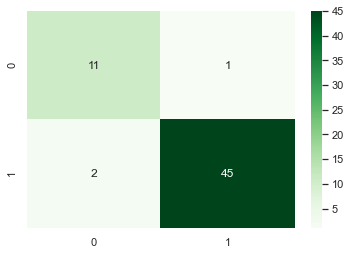

In [72]:
svm_model = SVC(C = 30, degree = 3, gamma = "auto", kernel = "rbf", probability = True)
svm_model.fit(X_train, y_train)

svm_score_rbf_train = svm_model.score(X_train, y_train)
print('SVM model score (Training Data):', svm_score_rbf_train)

svm_score_rbf = svm_model.score(X_test, y_test)
print('SVM model score (Testing Data):', svm_score_rbf)

svm_pred = svm_model.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)
print('True Possitive    = ',   svm_cm[1][1])
print('True Negative     = ',   svm_cm[0][0])
print('False Possive     = ',   svm_cm[0][1])
print('False Negative    = ',   svm_cm[1][0])

print("SVC - Classification Report")
print(classification_report(y_test, svm_pred, labels=[1, 0]))


probs = svm_model.predict_proba(X_test)
preds = probs[:,1]
SVM_Accuracy = accuracy_score(y_test, svm_pred)
print('SVM_Accuracy =', SVM_Accuracy)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
SVM_Gini = 2*roc_auc - 1
print('SVM_Gini =', SVM_Gini)
SVM_AUC = roc_auc
print('SVM_AUC =', SVM_AUC)

sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, cmap='Greens',fmt='g')

prec_svm_r = (svm_cm[1][1])/(svm_cm[1][1] + svm_cm[0][1])
rec_svm_r = (svm_cm[1][1])/(svm_cm[1][1] + svm_cm[1][0])
F1_svm_r = 2*(prec_svm_r * rec_svm_r)/(prec_svm_r + rec_svm_r)
print('Precision for SVM(rbf) :', round(prec_svm_r,2))
print('Recall for SVM(rbf) :', round(rec_svm_r, 2))
print('F1 score for SVM(rbf) :', round(F1_svm_r, 2))

##### SVM Classifier (kernel = linear)

SVM model score (Training Data): 0.9191176470588235
SVM model score (Testing Data): 0.8813559322033898
True Possitive    =  42
True Negative     =  10
False Possive     =  2
False Negative    =  5
SVC - Classification Report
              precision    recall  f1-score   support

           1       0.95      0.89      0.92        47
           0       0.67      0.83      0.74        12

   micro avg       0.88      0.88      0.88        59
   macro avg       0.81      0.86      0.83        59
weighted avg       0.90      0.88      0.89        59

SVM_Accuracy_Linear = 0.8813559322033898
SVM_Gini_Linear = 0.8865248226950353
SVM_AUC_Linear = 0.9432624113475176
Precision for SVM(linear) : 0.95
Recall for SVM(linear) : 0.89
F1 score for SVM(linear) : 0.92


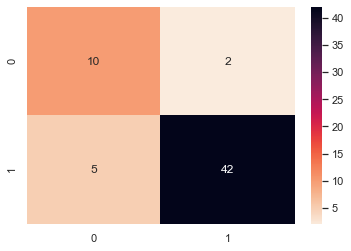

In [73]:
svm_model_l = SVC(C = 30, degree = 3, gamma = "auto", kernel = "linear", probability = True)
svm_model_l.fit(X_train, y_train)

svm_score_linear_train = svm_model_l.score(X_train, y_train)
print('SVM model score (Training Data):', svm_score_linear_train)

svm_linear_score = svm_model_l.score(X_test, y_test)
print('SVM model score (Testing Data):', svm_linear_score)

svm_pred = svm_model_l.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)
print('True Possitive    = ',   svm_cm[1][1])
print('True Negative     = ',   svm_cm[0][0])
print('False Possive     = ',   svm_cm[0][1])
print('False Negative    = ',   svm_cm[1][0])

print("SVC - Classification Report")
print(classification_report(y_test, svm_pred, labels=[1, 0]))


probs = svm_model_l.predict_proba(X_test)
preds = probs[:,1]
SVM_Accuracy_Linear = accuracy_score(y_test, svm_pred)
print('SVM_Accuracy_Linear =', SVM_Accuracy_Linear)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
SVM_Gini_Linear = 2*roc_auc - 1
print('SVM_Gini_Linear =', SVM_Gini_Linear)
SVM_AUC_Linear = roc_auc
print('SVM_AUC_Linear =', SVM_AUC_Linear)

sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, cmap='rocket_r',fmt='g')

prec_svm_l = (svm_cm[1][1])/(svm_cm[1][1] + svm_cm[0][1])
rec_svm_l = (svm_cm[1][1])/(svm_cm[1][1] + svm_cm[1][0])
F1_svm_l = 2*(prec_svm_l * rec_svm_l)/(prec_svm_l + rec_svm_l)
print('Precision for SVM(linear) :', round(prec_svm_l,2))
print('Recall for SVM(linear) :', round(rec_svm_l, 2))
print('F1 score for SVM(linear) :', round(F1_svm_l, 2))

### Meta Classifiers

We are using Stacking methods with traditional Supervised learning algorithms - Logistic Regression, Naive Bayes, SVM classifiers with kerner as rbf and linear. 
We are using the VotingClassifier from sklearn's ensemble set. 

Meta Classifier score (Training Data): 0.9705882352941176
Meta Classifier score (Testing Data): 0.9152542372881356
True Possitive    =  43
True Negative     =  11
False Possive     =  1
False Negative    =  4
Meta Classifier - Classification Report
              precision    recall  f1-score   support

           1       0.98      0.91      0.95        47
           0       0.73      0.92      0.81        12

   micro avg       0.92      0.92      0.92        59
   macro avg       0.86      0.92      0.88        59
weighted avg       0.93      0.92      0.92        59

sclf_Accuracy = 0.9152542372881356
sclf_Gini = 0.9645390070921986
sclf_AUC = 0.9822695035460993
Precision for Meta classifier : 0.98
Recall for Meta classifier : 0.91
F1 score for Meta classifier : 0.95


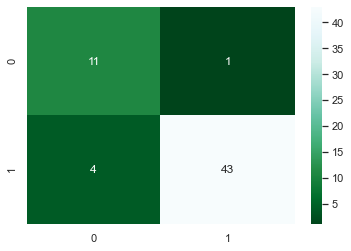

In [74]:
sclf = VotingClassifier(estimators=[('log',log_model), ('NB', nb_model), ('SVMR', svm_model), 
                                    ('SVML', svm_model_l)], voting='soft')
sclf.fit(X_train, y_train)

sclf_score_train = sclf.score(X_train, y_train)
print('Meta Classifier score (Training Data):', sclf_score_train)

sclf_score = sclf.score(X_test, y_test)
print('Meta Classifier score (Testing Data):', sclf_score)

sclf_pred = sclf.predict(X_test)
sclf_cm = confusion_matrix(y_test, sclf_pred)
print('True Possitive    = ',   sclf_cm[1][1])
print('True Negative     = ',   sclf_cm[0][0])
print('False Possive     = ',   sclf_cm[0][1])
print('False Negative    = ',   sclf_cm[1][0])

print("Meta Classifier - Classification Report")
print(classification_report(y_test, sclf_pred, labels=[1, 0]))


probs = sclf.predict_proba(X_test)
preds = probs[:,1]
sclf_Accuracy = accuracy_score(y_test, sclf_pred)
print('sclf_Accuracy =', sclf_Accuracy)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
sclf_Gini = 2*roc_auc - 1
print('sclf_Gini =', sclf_Gini)
sclf_AUC = roc_auc
print('sclf_AUC =', sclf_AUC)

sns.heatmap(confusion_matrix(y_test,sclf_pred), annot=True, cmap='BuGn_r',fmt='g')

prec_meta = (sclf_cm[1][1])/(sclf_cm[1][1] + sclf_cm[0][1])
rec_meta = (sclf_cm[1][1])/(sclf_cm[1][1] + sclf_cm[1][0])
F1_meta = 2*(prec_meta * rec_meta)/(prec_meta + rec_meta)
print('Precision for Meta classifier :', round(prec_meta,2))
print('Recall for Meta classifier :', round(rec_meta, 2))
print('F1 score for Meta classifier :', round(F1_meta, 2))

### Ensemble Models

##### Decision Tree Classifier

DT model score (Training Data): 0.9117647058823529
DT model score (Testing Data): 0.847457627118644
True Possitive    =  41
True Negative     =  9
False Possive     =  3
False Negative    =  6
Decision Tree - Classification Report
              precision    recall  f1-score   support

           1       0.93      0.87      0.90        47
           0       0.60      0.75      0.67        12

   micro avg       0.85      0.85      0.85        59
   macro avg       0.77      0.81      0.78        59
weighted avg       0.86      0.85      0.85        59

DT_Accuracy = 0.847457627118644
DT_Gini = 0.7925531914893618
DT_AUC = 0.8962765957446809
Precision for DT classifier : 0.93
Recall for DT classifier : 0.87
F1 score for DT classifier : 0.9


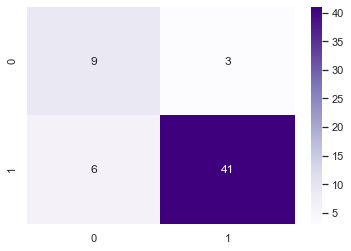

In [75]:
dt_model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, criterion = 'entropy')
dt_model.fit(X_train, y_train)

dt_score_train = dt_model.score(X_train, y_train)
print('DT model score (Training Data):', dt_score_train)

dt_score = dt_model.score(X_test, y_test)
print('DT model score (Testing Data):', dt_score)

dt_pred = dt_model.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_pred)
print('True Possitive    = ',   dt_cm[1][1])
print('True Negative     = ',   dt_cm[0][0])
print('False Possive     = ',   dt_cm[0][1])
print('False Negative    = ',   dt_cm[1][0])

print("Decision Tree - Classification Report")
print(classification_report(y_test, dt_pred, labels=[1, 0]))

probs = dt_model.predict_proba(X_test)
preds = probs[:,1]
DT_Accuracy = accuracy_score(y_test, dt_pred)
print('DT_Accuracy =', DT_Accuracy)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
DT_Gini = 2*roc_auc - 1
print('DT_Gini =', DT_Gini)
DT_AUC = roc_auc
print('DT_AUC =', DT_AUC)

sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, cmap='Purples',fmt='g')

prec_dt = (dt_cm[1][1])/(dt_cm[1][1] + dt_cm[0][1])
rec_dt = (dt_cm[1][1])/(dt_cm[1][1] + dt_cm[1][0])
F1_dt = 2*(prec_dt * rec_dt)/(prec_dt + rec_dt)
print('Precision for DT classifier :', round(prec_dt,2))
print('Recall for DT classifier :', round(rec_dt, 2))
print('F1 score for DT classifier :', round(F1_dt, 2))

##### Random Forest Classifier

RF model score (Training Data): 0.9558823529411765
RF model score (Testing Data): 0.9152542372881356
True Possitive    =  44
True Negative     =  10
False Possive     =  2
False Negative    =  3
Random Forest - Classification Report
              precision    recall  f1-score   support

           1       0.96      0.94      0.95        47
           0       0.77      0.83      0.80        12

   micro avg       0.92      0.92      0.92        59
   macro avg       0.86      0.88      0.87        59
weighted avg       0.92      0.92      0.92        59

RF_Accuracy = 0.9152542372881356
RF_Gini = 0.9503546099290778
RF_AUC = 0.9751773049645389
Precision for RF classifier : 0.96
Recall for RF classifier : 0.94
F1 score for RF classifier : 0.95


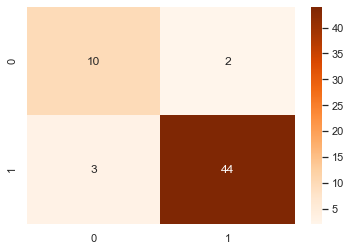

In [76]:
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=3, max_leaf_nodes=5)
rf_model.fit(X_train, y_train)

rf_score_train = rf_model.score(X_train, y_train)
print('RF model score (Training Data):', rf_score_train)

rf_score = rf_model.score(X_test, y_test)
print('RF model score (Testing Data):', rf_score)

rf_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)
print('True Possitive    = ',   rf_cm[1][1])
print('True Negative     = ',   rf_cm[0][0])
print('False Possive     = ',   rf_cm[0][1])
print('False Negative    = ',   rf_cm[1][0])

print("Random Forest - Classification Report")
print(classification_report(y_test, rf_pred, labels=[1, 0]))

probs = rf_model.predict_proba(X_test)
preds = probs[:,1]
RF_Accuracy = accuracy_score(y_test, rf_pred)
print('RF_Accuracy =', RF_Accuracy)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
RF_Gini = 2*roc_auc - 1
print('RF_Gini =', RF_Gini)
RF_AUC = roc_auc
print('RF_AUC =', RF_AUC)

sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True, cmap='Oranges',fmt='g')

prec_rf = (rf_cm[1][1])/(rf_cm[1][1] + rf_cm[0][1])
rec_rf = (rf_cm[1][1])/(rf_cm[1][1] + rf_cm[1][0])
F1_rf = 2*(prec_rf * rec_rf)/(prec_rf + rec_rf)
print('Precision for RF classifier :', round(prec_rf,2))
print('Recall for RF classifier :', round(rec_rf, 2))
print('F1 score for RF classifier :', round(F1_rf, 2))

##### Bagging Classifier

Bagging model score (Training Data): 0.9558823529411765
Bagging model score (Testing Data): 0.9322033898305084
True Possitive    =  45
True Negative     =  10
False Possive     =  2
False Negative    =  2
Bagging - Classification Report
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        47
           0       0.83      0.83      0.83        12

   micro avg       0.93      0.93      0.93        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.93      0.93      0.93        59

BAG_Accuracy = 0.9322033898305084
BAG_Gini = 0.9539007092198584
BAG_AUC = 0.9769503546099292
Precision for Bagging classifier : 0.96
Recall for Bagging classifier : 0.96
F1 score for Bagging classifier : 0.96


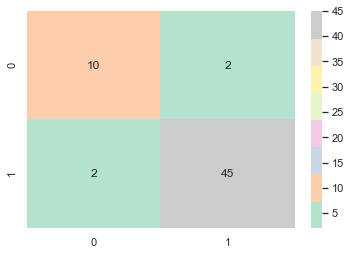

In [77]:
helper = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3, max_leaf_nodes=5)
bag_model = BaggingClassifier(base_estimator=helper, n_estimators=100)
bag_model.fit(X_train, y_train)

bag_score_train = bag_model.score(X_train, y_train)
print('Bagging model score (Training Data):', bag_score_train)

bag_score = bag_model.score(X_test, y_test)
print('Bagging model score (Testing Data):', bag_score)

bag_pred = bag_model.predict(X_test)
bag_cm = confusion_matrix(y_test, bag_pred)
print('True Possitive    = ',   bag_cm[1][1])
print('True Negative     = ',   bag_cm[0][0])
print('False Possive     = ',   bag_cm[0][1])
print('False Negative    = ',   bag_cm[1][0])

print("Bagging - Classification Report")
print(classification_report(y_test, bag_pred, labels=[1, 0]))

probs = bag_model.predict_proba(X_test)
preds = probs[:,1]
BAG_Accuracy = accuracy_score(y_test, bag_pred)
print('BAG_Accuracy =', BAG_Accuracy)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
BAG_Gini = 2*roc_auc - 1
print('BAG_Gini =', BAG_Gini)
BAG_AUC = roc_auc
print('BAG_AUC =', BAG_AUC)

sns.heatmap(confusion_matrix(y_test,bag_pred), annot=True, cmap='Pastel2',fmt='g')

prec_bag = (bag_cm[1][1])/(bag_cm[1][1] + bag_cm[0][1])
rec_bag = (bag_cm[1][1])/(bag_cm[1][1] + bag_cm[1][0])
F1_bag = 2*(prec_bag * rec_bag)/(prec_bag + rec_bag)
print('Precision for Bagging classifier :', round(prec_bag,2))
print('Recall for Bagging classifier :', round(rec_bag, 2))
print('F1 score for Bagging classifier :', round(F1_bag, 2))

##### Boosting Classifier

*Adaptive Boosting*

Ada Boost model score (Training Data): 0.9852941176470589
Ada Boost model score (Testing Data): 0.9661016949152542
True Possitive    =  46
True Negative     =  11
False Possive     =  1
False Negative    =  1
Ada Boost - Classification Report
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        47
           0       0.92      0.92      0.92        12

   micro avg       0.97      0.97      0.97        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.97      0.97      0.97        59

Ada BOOST_Accuracy = 0.9661016949152542
Ada BOOST_Gini = 0.9822695035460995
Ada BOOST_AUC = 0.9911347517730498
Precision for AdaBoost classifier : 0.98
Recall for AdaBoost classifier : 0.98
F1 score for AdaBoost classifier : 0.98


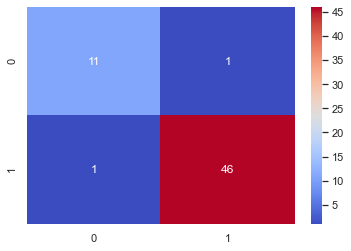

In [80]:
helper = RandomForestClassifier(n_estimators=150, max_depth=5, max_leaf_nodes=3)
#helper = DecisionTreeClassifier(criterion='entropy')
#helper = LogisticRegression()
Aboost_model = AdaBoostClassifier(n_estimators= 500, base_estimator=helper, learning_rate=1, random_state=1)
Aboost_model.fit(X_train, y_train)

Aboost_score_train = Aboost_model.score(X_train, y_train)
print('Ada Boost model score (Training Data):', Aboost_score_train)

Aboost_score = Aboost_model.score(X_test, y_test)
print('Ada Boost model score (Testing Data):', Aboost_score)

Aboost_pred = Aboost_model.predict(X_test)
Aboost_cm = confusion_matrix(y_test, Aboost_pred)
print('True Possitive    = ',   Aboost_cm[1][1])
print('True Negative     = ',   Aboost_cm[0][0])
print('False Possive     = ',   Aboost_cm[0][1])
print('False Negative    = ',   Aboost_cm[1][0])

print("Ada Boost - Classification Report")
print(classification_report(y_test, Aboost_pred, labels=[1, 0]))

probs = Aboost_model.predict_proba(X_test)
preds = probs[:,1]
ABOOST_Accuracy = accuracy_score(y_test, Aboost_pred)
print('Ada BOOST_Accuracy =', ABOOST_Accuracy)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
ABOOST_Gini = 2*roc_auc - 1
print('Ada BOOST_Gini =', ABOOST_Gini)
ABOOST_AUC = roc_auc
print('Ada BOOST_AUC =', ABOOST_AUC)

sns.heatmap(confusion_matrix(y_test,Aboost_pred), annot=True, cmap='coolwarm',fmt='g')

prec_aboost = (Aboost_cm[1][1])/(Aboost_cm[1][1] + Aboost_cm[0][1])
rec_aboost = (Aboost_cm[1][1])/(Aboost_cm[1][1] + Aboost_cm[1][0])
F1_aboost = 2*(prec_aboost * rec_aboost)/(prec_aboost + rec_aboost)
print('Precision for AdaBoost classifier :', round(prec_aboost,2))
print('Recall for AdaBoost classifier :', round(rec_aboost, 2))
print('F1 score for AdaBoost classifier :', round(F1_aboost, 2))

*Gradient Boosting*

GRAD Boost model score (Training Data): 1.0
GRAD Boost model score (Testing Data): 0.9322033898305084
True Possitive    =  44
True Negative     =  11
False Possive     =  1
False Negative    =  3
GRAD Boost - Classification Report
              precision    recall  f1-score   support

           1       0.98      0.94      0.96        47
           0       0.79      0.92      0.85        12

   micro avg       0.93      0.93      0.93        59
   macro avg       0.88      0.93      0.90        59
weighted avg       0.94      0.93      0.93        59

GRAD BOOST_Accuracy = 0.9322033898305084
GRAD BOOST_Gini = 0.9751773049645391
GRAD BOOST_AUC = 0.9875886524822696
Precision for G-Boost classifier : 0.98
Recall for G-Boost classifier : 0.94
F1 score for G-Boost classifier : 0.96


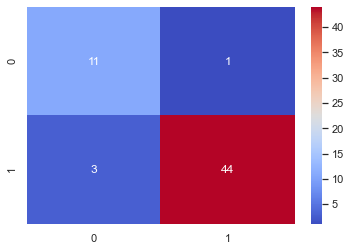

In [81]:
Gboost_model = GradientBoostingClassifier(n_estimators= 250, learning_rate=1, max_depth=5, max_leaf_nodes=3)
Gboost_model.fit(X_train, y_train)

Gboost_score_train = Gboost_model.score(X_train, y_train)
print('GRAD Boost model score (Training Data):', Gboost_score_train)

Gboost_score = Gboost_model.score(X_test, y_test)
print('GRAD Boost model score (Testing Data):', Gboost_score)

Gboost_pred = Gboost_model.predict(X_test)
Gboost_cm = confusion_matrix(y_test, Gboost_pred)
print('True Possitive    = ',   Gboost_cm[1][1])
print('True Negative     = ',   Gboost_cm[0][0])
print('False Possive     = ',   Gboost_cm[0][1])
print('False Negative    = ',   Gboost_cm[1][0])

print("GRAD Boost - Classification Report")
print(classification_report(y_test, Gboost_pred, labels=[1, 0]))

probs = Gboost_model.predict_proba(X_test)
preds = probs[:,1]
GBOOST_Accuracy = accuracy_score(y_test, Gboost_pred)
print('GRAD BOOST_Accuracy =', GBOOST_Accuracy)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
GBOOST_Gini = 2*roc_auc - 1
print('GRAD BOOST_Gini =', GBOOST_Gini)
GBOOST_AUC = roc_auc
print('GRAD BOOST_AUC =', GBOOST_AUC)

sns.heatmap(confusion_matrix(y_test,Gboost_pred), annot=True, cmap='coolwarm',fmt='g')

prec_gboost = (Gboost_cm[1][1])/(Gboost_cm[1][1] + Gboost_cm[0][1])
rec_gboost = (Gboost_cm[1][1])/(Gboost_cm[1][1] + Gboost_cm[1][0])
F1_gboost = 2*(prec_gboost * rec_gboost)/(prec_gboost + rec_gboost)
print('Precision for G-Boost classifier :', round(prec_gboost,2))
print('Recall for G-Boost classifier :', round(rec_gboost, 2))
print('F1 score for G-Boost classifier :', round(F1_gboost, 2))

## Comparing Models

In [82]:
Compare = [[Logistic_Accuracy,Logistic_Gini,Logistic_AUC, prec_log, rec_log, F1_log],
           [NB_Accuracy,NB_Gini,NB_AUC, prec_nb, rec_nb, F1_nb], 
           [SVM_Accuracy_Linear,SVM_Gini_Linear,SVM_AUC_Linear, prec_svm_l, rec_svm_l, F1_svm_l], 
           [SVM_Accuracy,SVM_Gini,SVM_AUC,prec_svm_r, rec_svm_r, F1_svm_r],
           [DT_Accuracy,DT_Gini,DT_AUC, prec_dt, rec_dt, F1_dt], 
           [RF_Accuracy,RF_Gini,RF_AUC,prec_rf, rec_rf, F1_rf], 
           [BAG_Accuracy,BAG_Gini,BAG_AUC, prec_bag, rec_bag, F1_bag],
           [ABOOST_Accuracy,ABOOST_Gini,ABOOST_AUC, prec_aboost, rec_aboost, F1_aboost],
           [GBOOST_Accuracy,GBOOST_Gini,GBOOST_AUC,prec_gboost, rec_gboost, F1_gboost],
           [sclf_Accuracy,sclf_Gini,sclf_AUC, prec_meta, rec_meta, F1_meta]
          ]

In [83]:
pd.DataFrame(Compare, 
                 columns= ['Accuracy','Gini Index', 'AUC', 'Precision', 'Recall', 'F1 score'], 
                 index=['Logistic Regression','NB','SVM (Linear)','SVM (rbf)','Decision Tree',
                        'Random Forest', 'Bagging','ADA-Boosting', 'GRAD-Boosting', 'Meta-sclf'])

Accuracy  Gini Index       AUC  Precision    Recall  \
Logistic Regression  0.898305    0.921986  0.960993   0.955556  0.914894   
NB                   0.694915    0.890071  0.945035   1.000000  0.617021   
SVM (Linear)         0.881356    0.886525  0.943262   0.954545  0.893617   
SVM (rbf)            0.949153    0.971631  0.985816   0.978261  0.957447   
Decision Tree        0.847458    0.792553  0.896277   0.931818  0.872340   
Random Forest        0.915254    0.950355  0.975177   0.956522  0.936170   
Bagging              0.932203    0.953901  0.976950   0.957447  0.957447   
ADA-Boosting         0.966102    0.982270  0.991135   0.978723  0.978723   
GRAD-Boosting        0.932203    0.975177  0.987589   0.977778  0.936170   
Meta-sclf            0.915254    0.964539  0.982270   0.977273  0.914894   

                     F1 score  
Logistic Regression  0.934783  
NB                   0.763158  
SVM (Linear)         0.923077  
SVM (rbf)            0.967742  
Decision Tree        0.901099  
Random Forest        0.946237  
Bagging              0.957447  
ADA-Boosting         0.978723  
GRAD-Boosting        0.956522  
Meta-sclf            0.945055

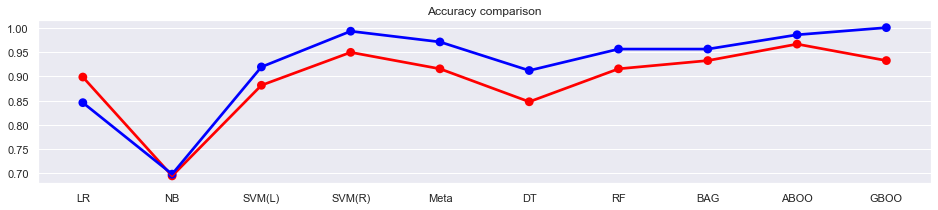

In [86]:
legend = ['LR', 'NB', 'SVM(L)', 'SVM(R)', 'Meta', 'DT', 'RF', 'BAG', 'ABOO', 'GBOO']
scores_test = [log_score, nb_score, svm_linear_score, 
               svm_score_rbf, sclf_score, dt_score, rf_score, bag_score, Aboost_score, Gboost_score]
scores_train = [log_score_train, nb_score_train, svm_score_linear_train, svm_score_rbf_train, sclf_score_train,
               dt_score_train, rf_score_train, bag_score_train, Aboost_score_train, Gboost_score_train]
plt.figure(figsize=(16, 3))
plt.title('Accuracy comparison')

sns.pointplot(legend, scores_test, color = 'red', label = 'Test Accuracy')
sns.pointplot(legend, scores_train, color ='blue', label = 'Training Accuracy')

*Accuracy scores of many models are similar but SVM(rbf) and Ada-Boost classifier has the best Test Accuracy (red). But in case of dataset where there is sample bais/class imbalance, accuracy is not the best evaluation metric. We need to look at Precision, Recall and F1 scores along with the AUC and Gini scores*

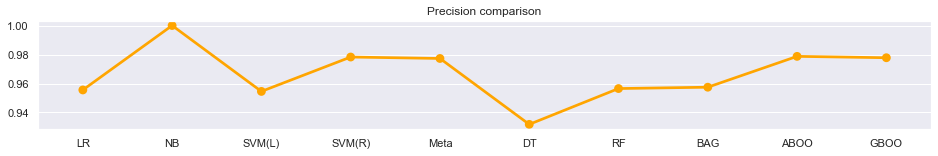

In [87]:
prec_test = [prec_log, prec_nb, prec_svm_l, prec_svm_r, prec_meta, prec_dt, prec_rf, prec_bag, prec_aboost, prec_gboost]
plt.figure(figsize=(16, 2))
plt.title('Precision comparison')
sns.pointplot(legend, prec_test, color ='orange')

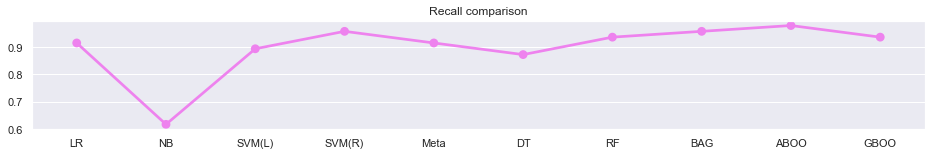

In [88]:
rec_test = [rec_log, rec_nb, rec_svm_l, rec_svm_r, rec_meta, rec_dt, rec_rf, rec_bag, rec_aboost, rec_gboost]
plt.figure(figsize=(16, 2))
plt.title('Recall comparison')
sns.pointplot(legend, rec_test, color ='violet')

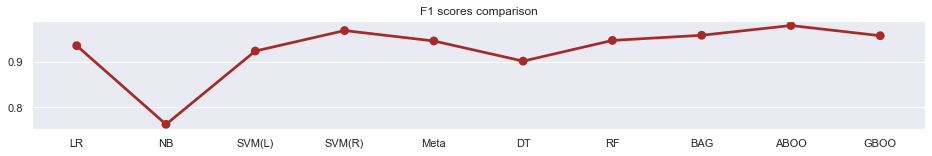

In [90]:
F1_test = [F1_log, F1_nb, F1_svm_l, F1_svm_r, F1_meta, F1_dt, F1_rf, F1_bag, F1_aboost, F1_gboost]
plt.figure(figsize=(16, 2))
plt.title('F1 scores comparison')
sns.pointplot(legend, F1_test, color ='brown')

*The overall F1 score (i.e the harmonic mean of Precision and Recall) is the best for Ada boost model with SVM (rbf) coming a close second. This inclines us more in favour of Adaptive boosting*

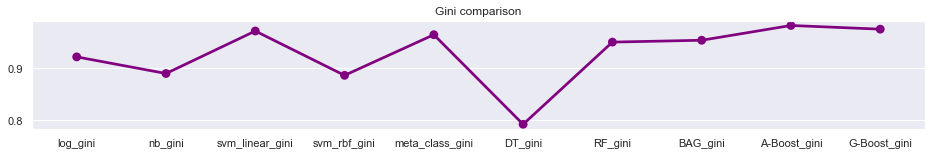

In [93]:
gini_test = [Logistic_Gini, NB_Gini, SVM_Gini, 
               SVM_Gini_Linear, sclf_Gini, DT_Gini, RF_Gini, BAG_Gini, ABOOST_Gini, GBOOST_Gini]
gini_leg=['log_gini', 'nb_gini', 'svm_linear_gini', 'svm_rbf_gini', 'meta_class_gini', 'DT_gini',
          'RF_gini', 'BAG_gini', 'A-Boost_gini', 'G-Boost_gini']

plt.figure(figsize=(16, 2))
plt.title('Gini comparison')
sns.pointplot(gini_leg, gini_test, color ='purple')

*Gini scores for SVM(rbf) and AdaBoost classifiers are similar and best among others. However, Ada-boost scores just edges out SVM*

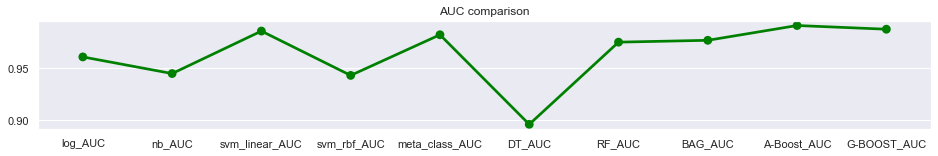

In [94]:
auc_test = [Logistic_AUC, NB_AUC, SVM_AUC, 
               SVM_AUC_Linear, sclf_AUC, DT_AUC, RF_AUC, BAG_AUC, ABOOST_AUC, GBOOST_AUC]
auc_leg=['log_AUC', 'nb_AUC', 'svm_linear_AUC', 'svm_rbf_AUC', 'meta_class_AUC', 'DT_AUC',
          'RF_AUC', 'BAG_AUC', 'A-Boost_AUC', 'G-BOOST_AUC']

plt.figure(figsize=(16, 2))
plt.title('AUC comparison')
sns.pointplot(auc_leg, auc_test, color ='green')

*ADABoost model here clearly has the best AUC score among all the models*

### Final Thoughts:

We would choose **Adaptive Boosting method** because of the following reasons - 
1. It gives us the best Test Accuracy score as can be seen in the *Accuracy Comparison* plot.
2. Due to class imbalance in the dataset, we could not merely rely on the accuracy scores of these model as an evaluation metric. Considering Precision, recall and F1 scores, we find the Ada Boost model slightly edges out other models. This can be validated using plots - *Precision comparison*, *Recall comparison* and *F1 score comparison*. 
2. It has the best Gini score as seen in the *Gini comparison* plot
3. It has the best AUC score as seen in the *AUC comparison* plot

As seen from the above plots. SVN (rbf kernel) also gives the same accuracy as Ada Boosting, but the later has slightly better Gini and AUC scores.
Random Forest, Gradient Boost and Bagging Classifiers have similar Accuracy scores
Decision Tree, Logistic regression and SVM(linear kernel) have similar Accuracy scores

__________________________________________________________